In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# 1. 이미지 셋 읽어오기
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
# 이미지 1장은 28x28=784 픽셀
train_images[0].shape

(28, 28)

In [7]:
# 이미지가 어떤 종류의 옷인지
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [8]:
# 4차원으로 만들기
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [9]:
# 스케일링
train_images, test_images = train_images/255.0, test_images/255.0

In [10]:
# 특성 추출 처리
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

In [11]:
# 심층신경망
model.add(Flatten())# 입력층
model.add(Dense(64, activation='relu'))  # 은닉층
model.add(Dense(10, activation='softmax'))  # 출력층

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# train 데이터로 학습
history=model.fit(train_images, train_labels, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 18s 30ms/step - loss: 0.6050 - accuracy: 0.7765
Epoch 2/10
600/600 [==============================] - 18s 30ms/step - loss: 0.3746 - accuracy: 0.8671
Epoch 3/10
600/600 [==============================] - 18s 30ms/step - loss: 0.3268 - accuracy: 0.8818
Epoch 4/10
600/600 [==============================] - ETA: 0s - loss: 0.2905 - accuracy: 0.89 - 18s 30ms/step - loss: 0.2905 - accuracy: 0.8957
Epoch 5/10
600/600 [==============================] - 18s 29ms/step - loss: 0.2664 - accuracy: 0.9039
Epoch 6/10
600/600 [==============================] - 18s 30ms/step - loss: 0.2490 - accuracy: 0.9086
Epoch 7/10
600/600 [==============================] - 18s 30ms/step - loss: 0.2282 - accuracy: 0.9161
Epoch 8/10
600/600 [==============================] - 18s 30ms/step - loss: 0.2118 - accuracy: 0.9220
Epoch 9/10
600/600 [==============================] - 18s 29ms/step - loss: 0.1995 - accuracy: 0.9261
Epoch 10/10
600/600 [===================

In [15]:
history

In [16]:
# 손실률, 정확도
loss, acc=model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.2654 - accuracy: 0.9048 - 1s/epoch - 3ms/step


In [17]:
loss, acc

(0.26540371775627136, 0.9047999978065491)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# 이미지 시각화
(train_images2, train_labels2), (test_images2, test_labels2) = fashion_mnist.load_data()

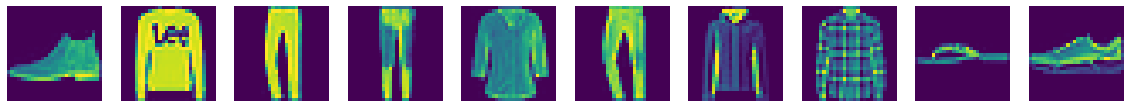

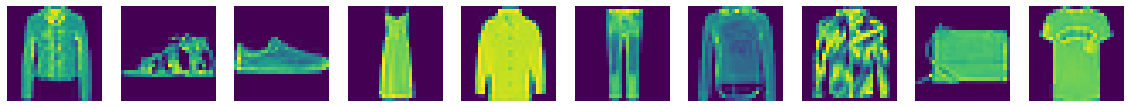

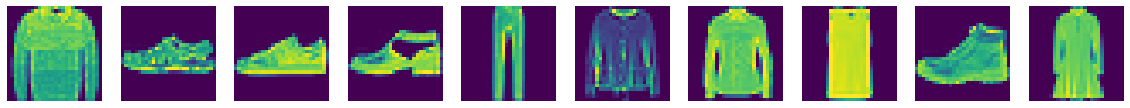

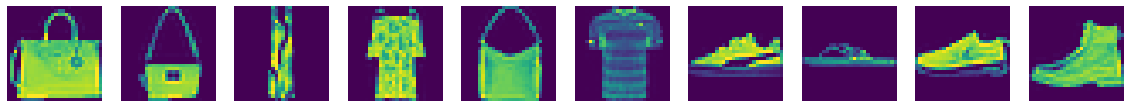

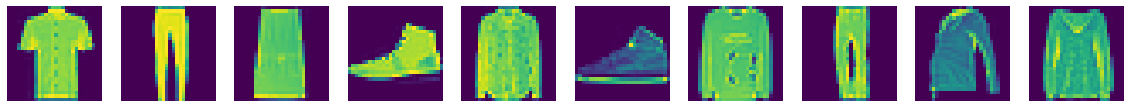

In [46]:
for i in range(5):
    fig, axs=plt.subplots(1, 10, figsize=(20,20))
    for j in range(10):
        axs[j].imshow(test_images2[j+i*10])
        axs[j].axis('off')

In [21]:
# 적중률 시각화
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [22]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred=model.predict(test_images)

In [23]:
y_pred_test=np.argmax(y_pred, axis=-1)

In [24]:
print(confusion_matrix(y_pred_test, test_labels))

[[870   2  22  15   0   0 123   0   5   0]
 [  0 987   0  18   1   0   2   0   1   0]
 [ 19   0 827   7  27   0  55   0   3   1]
 [ 12   6   9 892  18   1  17   0   6   0]
 [  4   1  97  35 899   0 101   0   3   0]
 [  0   0   0   0   0 978   0  12   1   4]
 [ 91   2  43  31  54   0 695   0   6   0]
 [  0   0   0   0   0  11   0 956   0  26]
 [  4   2   2   2   1   0   7   2 975   0]
 [  0   0   0   0   0  10   0  30   0 969]]


In [25]:
df=pd.DataFrame(confusion_matrix(y_pred_test, test_labels))

In [26]:
# 각 상품 이미지의 적중률 리스트
score_list=[]
for i in range(10):
    score_list.append(round((df.iloc[i,i]/df.sum(axis=1)[i])*100, 2))

In [27]:
score_list

[83.9, 97.82, 88.07, 92.82, 78.86, 98.29, 75.38, 96.27, 97.99, 96.04]

In [28]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

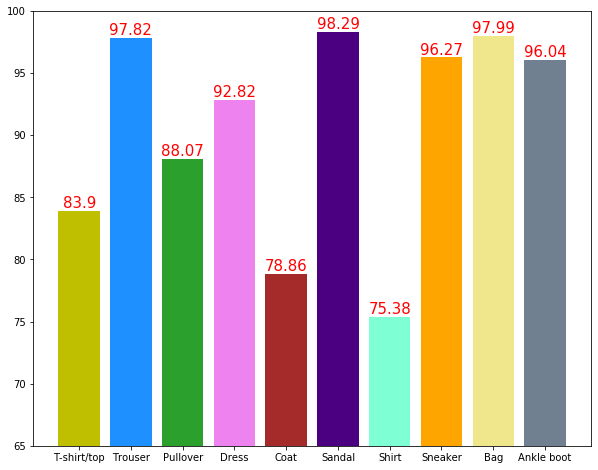

In [56]:
# 각 이미지의 적중률
plt.figure(figsize=(10,8))
x = target_names
fashon_type = target_names
values = score_list
colors = ['y', 'dodgerblue', 'C2', 'violet', 'brown', 'indigo', 'aquamarine', 'orange', 'khaki', 'slategray']

plt.bar(x, values, color=colors)
plt.xticks(x, fashon_type)
plt.ylim([65, 100])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

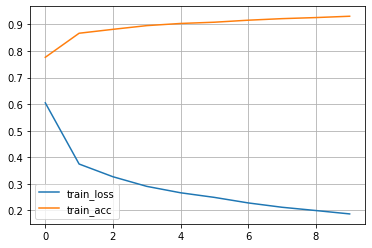

In [30]:
# 손실률, 정확도 시각화
plt.plot(history.history['loss'])
#plt.plot(loss)
plt.plot(history.history['accuracy'])
#plt.plot(acc)
plt.legend(['train_loss', 'train_acc'])
plt.grid()
plt.show()